In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap

import seaborn as sns

from sklearn.datasets import load_breast_cancer

%matplotlib inline

In [2]:
cancer=load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
features=pd.DataFrame(cancer.data,columns=cancer.feature_names)
target=pd.DataFrame(cancer.target,columns=['Target'])

In [4]:
df=pd.concat([features,target],axis=1)

In [5]:
X=np.array(df['worst concave points'])
Y=np.array(df['Target'])

In [22]:
X=X.reshape(-1,1)

In [23]:
scaler = MinMaxScaler()

In [28]:
X=scaler.fit_transform(X)

In [29]:
regressor = LogisticRegression()

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size =0.2)

In [31]:
regressor.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
y_pred=regressor.predict(xtest)

In [33]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0])

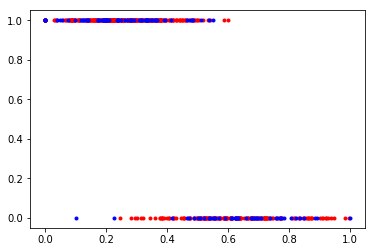

In [35]:
plt.plot(xtrain,ytrain,'r.',xtest,ytest,'b.')

In [37]:
cm = confusion_matrix(ytest,y_pred)

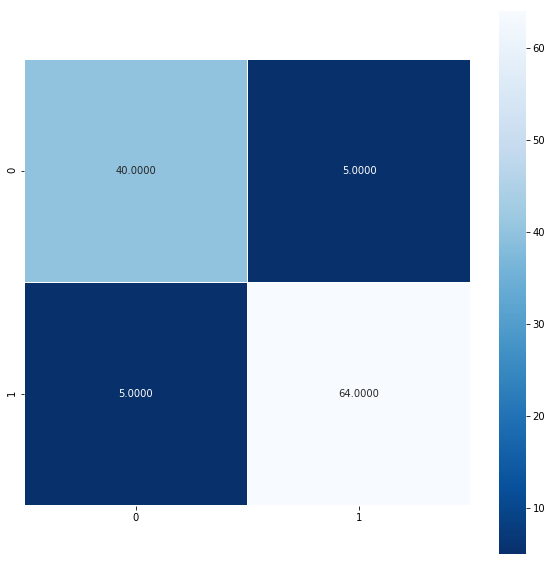

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='.4f',linewidth=.5,square=True,cmap='Blues_r')

In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_pred))

0.9122807017543859


In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        45
           1       0.93      0.93      0.93        69

   micro avg       0.91      0.91      0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

